In [99]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [89]:
url = BeautifulSoup('https://www.worldometers.info/coronavirus/#countries', 'html.parser')
response = requests.get(url)
print(response)

<Response [200]>


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 94,362,632 Cases and 2,019,015 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
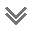

In [90]:
data = response.text
#print(data)
#data
soup = BeautifulSoup(data, 'lxml')
print(soup)

In [91]:
get_table = soup.find("table",id="main_table_countries_today")
#get_table
get_table_data = get_table.tbody.find_all("tr")
#get_table_data

In [167]:
dict = {}

#n = len(get_table_data)
#print(n)
for i in range(len(get_table_data)):
    try:
        key = get_table_data[i].find_all("a",href= True)[0].string
    except:
        key = get_table_data[i].find_all("td")[0].string
    #print(key)
    # list comprehension -> helps to write python code in single line
    values = [j.string for j in get_table_data[i].find_all('td')]
    
    dict[key] = values
#print(dict)  
#pd.DataFrame(dict)
column_names = ["TotalCases","New Cases","TotalDeaths", "New Deaths","TotalRecovered","Active Cases","Serious","Tot Cases/1M pop","Deaths/1M pop","Total Tests","Tests/1M pop", "Population"]
df = pd.DataFrame(dict).iloc[2:,1:].T.iloc[:,:12]
df

,2,3,4,5,6,7,8,9,10,11,12,13
USA,"24,102,429",None,"401,856",None,"14,228,969",None,"9,471,604","28,937","72,586","1,210","281,809,885","848,683"
India,"10,543,659",None,"152,130",None,"10,179,715",+832,"211,814","8,944","7,600",110,"185,765,491","133,900"
Brazil,"8,394,253",None,"208,291",None,"7,361,379",None,"824,583","8,318","39,340",976,"28,600,000","134,034"
Russia,"3,544,623","+24,092","65,085",+590,"2,936,991","+27,311","542,547","2,300","24,283",446,"96,200,000","659,046"
UK,"3,316,019",None,"87,295",None,"1,503,654",None,"1,725,070","3,672","48,708","1,282","63,139,169","927,432"
...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,4,None,,None,1,None,3,None,359,None,"1,149","103,225"
Samoa,2,None,,None,2,None,0,None,10,None,None,None
Micronesia,1,None,,None,None,None,1,None,9,None,None,None
Vanuatu,1,None,,None,1,None,0,None,3,None,470,"1,511"


In [168]:
df.index_name = "country"
df.columns = column_names
df

,TotalCases,New Cases,TotalDeaths,New Deaths,TotalRecovered,Active Cases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
USA,"24,102,429",None,"401,856",None,"14,228,969",None,"9,471,604","28,937","72,586","1,210","281,809,885","848,683"
India,"10,543,659",None,"152,130",None,"10,179,715",+832,"211,814","8,944","7,600",110,"185,765,491","133,900"
Brazil,"8,394,253",None,"208,291",None,"7,361,379",None,"824,583","8,318","39,340",976,"28,600,000","134,034"
Russia,"3,544,623","+24,092","65,085",+590,"2,936,991","+27,311","542,547","2,300","24,283",446,"96,200,000","659,046"
UK,"3,316,019",None,"87,295",None,"1,503,654",None,"1,725,070","3,672","48,708","1,282","63,139,169","927,432"
...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,4,None,,None,1,None,3,None,359,None,"1,149","103,225"
Samoa,2,None,,None,2,None,0,None,10,None,None,None
Micronesia,1,None,,None,None,None,1,None,9,None,None,None
Vanuatu,1,None,,None,1,None,0,None,3,None,470,"1,511"


In [169]:
df.to_csv("coronaVirus_cases.csv")

In [170]:
df = pd.read_csv('coronaVirus_cases.csv', index_col=0)
df.head(20)

,TotalCases,New Cases,TotalDeaths,New Deaths,TotalRecovered,Active Cases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
USA,"24,102,429",NaN,"401,856",NaN,"14,228,969",NaN,"9,471,604","28,937","72,586","1,210","281,809,885","848,683"
India,"10,543,659",NaN,"152,130",NaN,"10,179,715",+832,"211,814","8,944","7,600",110,"185,765,491","133,900"
Brazil,"8,394,253",NaN,"208,291",NaN,"7,361,379",NaN,"824,583","8,318","39,340",976,"28,600,000","134,034"
Russia,"3,544,623","+24,092","65,085",+590,"2,936,991","+27,311","542,547","2,300","24,283",446,"96,200,000","659,046"
UK,"3,316,019",NaN,"87,295",NaN,"1,503,654",NaN,"1,725,070","3,672","48,708","1,282","63,139,169","927,432"
France,"2,872,941",NaN,"69,949",NaN,"208,071",NaN,"2,594,921","2,740","43,961","1,070","39,233,615","600,343"
Turkey,"2,373,115",NaN,"23,664",NaN,"2,246,047",NaN,"103,404","2,311","27,975",279,"27,066,653","319,070"
Italy,"2,352,423",NaN,"81,325",NaN,"1,713,030",NaN,"558,068","2,522","38,939","1,346","28,734,210","475,627"
Spain,"2,252,164",NaN,"53,314",NaN,NaN,NaN,NaN,"2,953","48,160","1,140","28,775,103","615,318"
Germany,"2,023,802",NaN,"46,537",NaN,"1,641,200",NaN,"336,065","5,074","24,113",554,"36,353,196","433,140"


In [171]:
import matplotlib.pyplot as plt

In [182]:
x = df['TotalCases'].iloc[0:20].values
#print(x)
y = df['TotalDeaths'].iloc[0:20].values
#print(y)

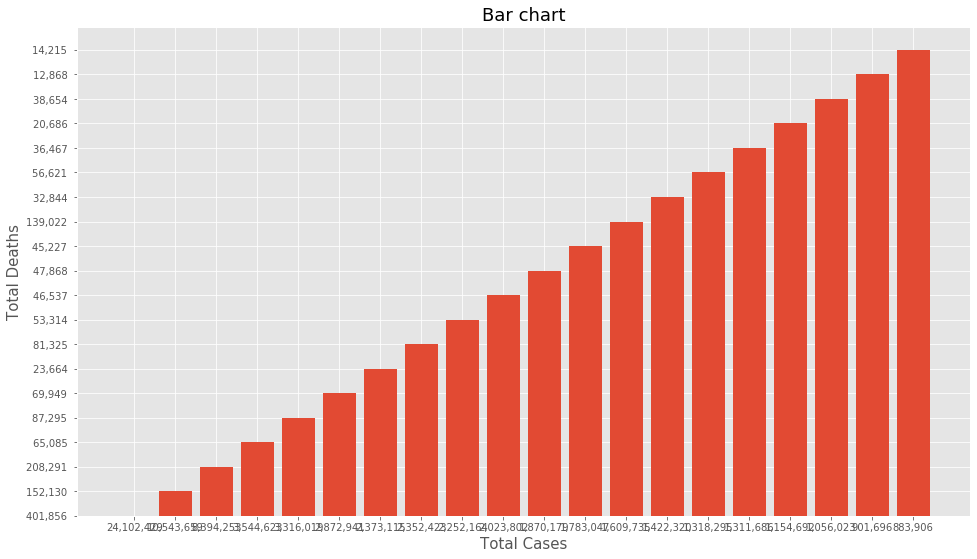

In [184]:
from matplotlib import style 
style.use("ggplot")
plt.figure(figsize=(16,9))
plt.title("Bar chart", fontsize = 18)
plt.xlabel("Total Cases", fontsize = 15)
plt.ylabel("Total Deaths", fontsize = 15)
plt.bar(x,y)

plt.show()